u - g    0
g - r    0
r - i    0
i - z    0
dtype: int64
0
u - g    0
g - r    0
r - i    0
i - z    0
dtype: int64
0
              u - g         g - r         r - i         i - z
count  79136.000000  79136.000000  79136.000000  79136.000000
mean       1.245351      0.566304      0.294189      0.188688
std        0.542216      0.312317      0.186320      0.178152
min       -2.719890     -6.321030     -4.420720     -4.878580
25%        1.009147      0.363840      0.193803      0.085138
50%        1.271930      0.583065      0.340140      0.205520
75%        1.633983      0.808853      0.416540      0.304760
max        4.028290      4.333770      3.681760      4.796460
count    79136.000000
mean         0.212824
std          0.478345
min          0.000000
25%          0.025487
50%          0.070713
75%          0.112554
max          6.990327
Name: redshift, dtype: float64
(55395, 4) (23741, 4)
(55395,) (23741,)
Mean Squared Error (MSE):  0.14740626750761457
R^2 Score:  0.3504089651096692

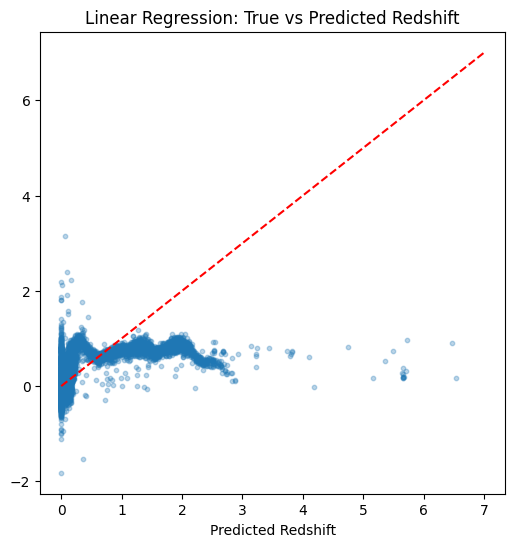

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

%matplotlib inline

df = pd.read_csv(r'C:\Users\hunjr\Documents\REPD-SDSS\data\SDSS_DR18.csv')

df['u - g'] = df['u'] - df['g']
df['g - r'] = df['g'] - df['r']
df['r - i'] = df['r'] - df['i']
df['i - z'] = df['i'] - df['z']


# Found large standard deviation for (r - i) and (i - z)
# Lock color index range for boths
df = df[(df['r - i'] > -5) & (df['r - i'] < 5)]
df = df[(df['i - z'] > -5) & (df['i - z'] < 5)]

# Found occasional <0 redshift values (most likely due to noise)
# Lock at zero or above
df = df[df['redshift'] >= 0]


# Input feature: X
# This is for prediction
X = df[['u - g', 'g - r', 'r - i', 'i - z']]

# Target: y
# This is the answer the model is learnings
y = df['redshift']




# Check for missing values (NaN)
print(X.isna().sum())
print(y.isna().sum())

# Check for infinite values
print(np.isinf(X).sum())
print(np.isinf(y).sum())

# Double check ranges
print(X.describe())
print(y.describe())

# Train and test model

X_train, X_test, y_train, y_test = train_test_split(
    X, y,             # Feature & Target
    test_size = 0.3,  # leaving 70% for training
    random_state = 42 # Reproducibility
)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

# Train a Linear Regression model as data is somewhat clearly linked
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set (predict redshift for the test set)
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print error size and goodness of fit
print("Mean Squared Error (MSE): ", mse)
print("R^2 Score: ", r2)

# Create visual scatter plot to compare true vs predicted redshift
plt.figure(figsize = (6, 6))
plt.scatter(y_test, y_pred, alpha = 0.3, s = 10)
plt.xlabel("True Redshift")
plt.xlabel("Predicted Redshift")
plt.title("Linear Regression: True vs Predicted Redshift")
plt.plot([0, 7], [0, 7], 'r--')
plt.show()
